**Name：Xiaojia Ma  
Github Username: Miranda1220  
USC ID: 6812467076**



In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


### (a) Download and import the Vertebral Column Data Set

In [2]:
# import the arff file (include the dataset and the metadata)
data, meta = arff.loadarff('../data/column_2C_weka.arff')

# convert data into a pandas dataframe
df = pd.DataFrame(data)

# decode the "class" column from bytes to string
df['class'] = df['class'].str.decode('utf-8')

# replace the class labels with 1 and 0
df['class'] = df['class'].replace({'Abnormal': 1, 'Normal': 0})

df
#

C:\Users\小圆子\AppData\Local\Temp\ipykernel_26192\3962814113.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'Abnormal': 1, 'Normal': 0})


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

`seaborn.pairplot()` and `scatter_matrix()` could also be used, scatter_matrix is more suitable when dataset has more than 10000 records.


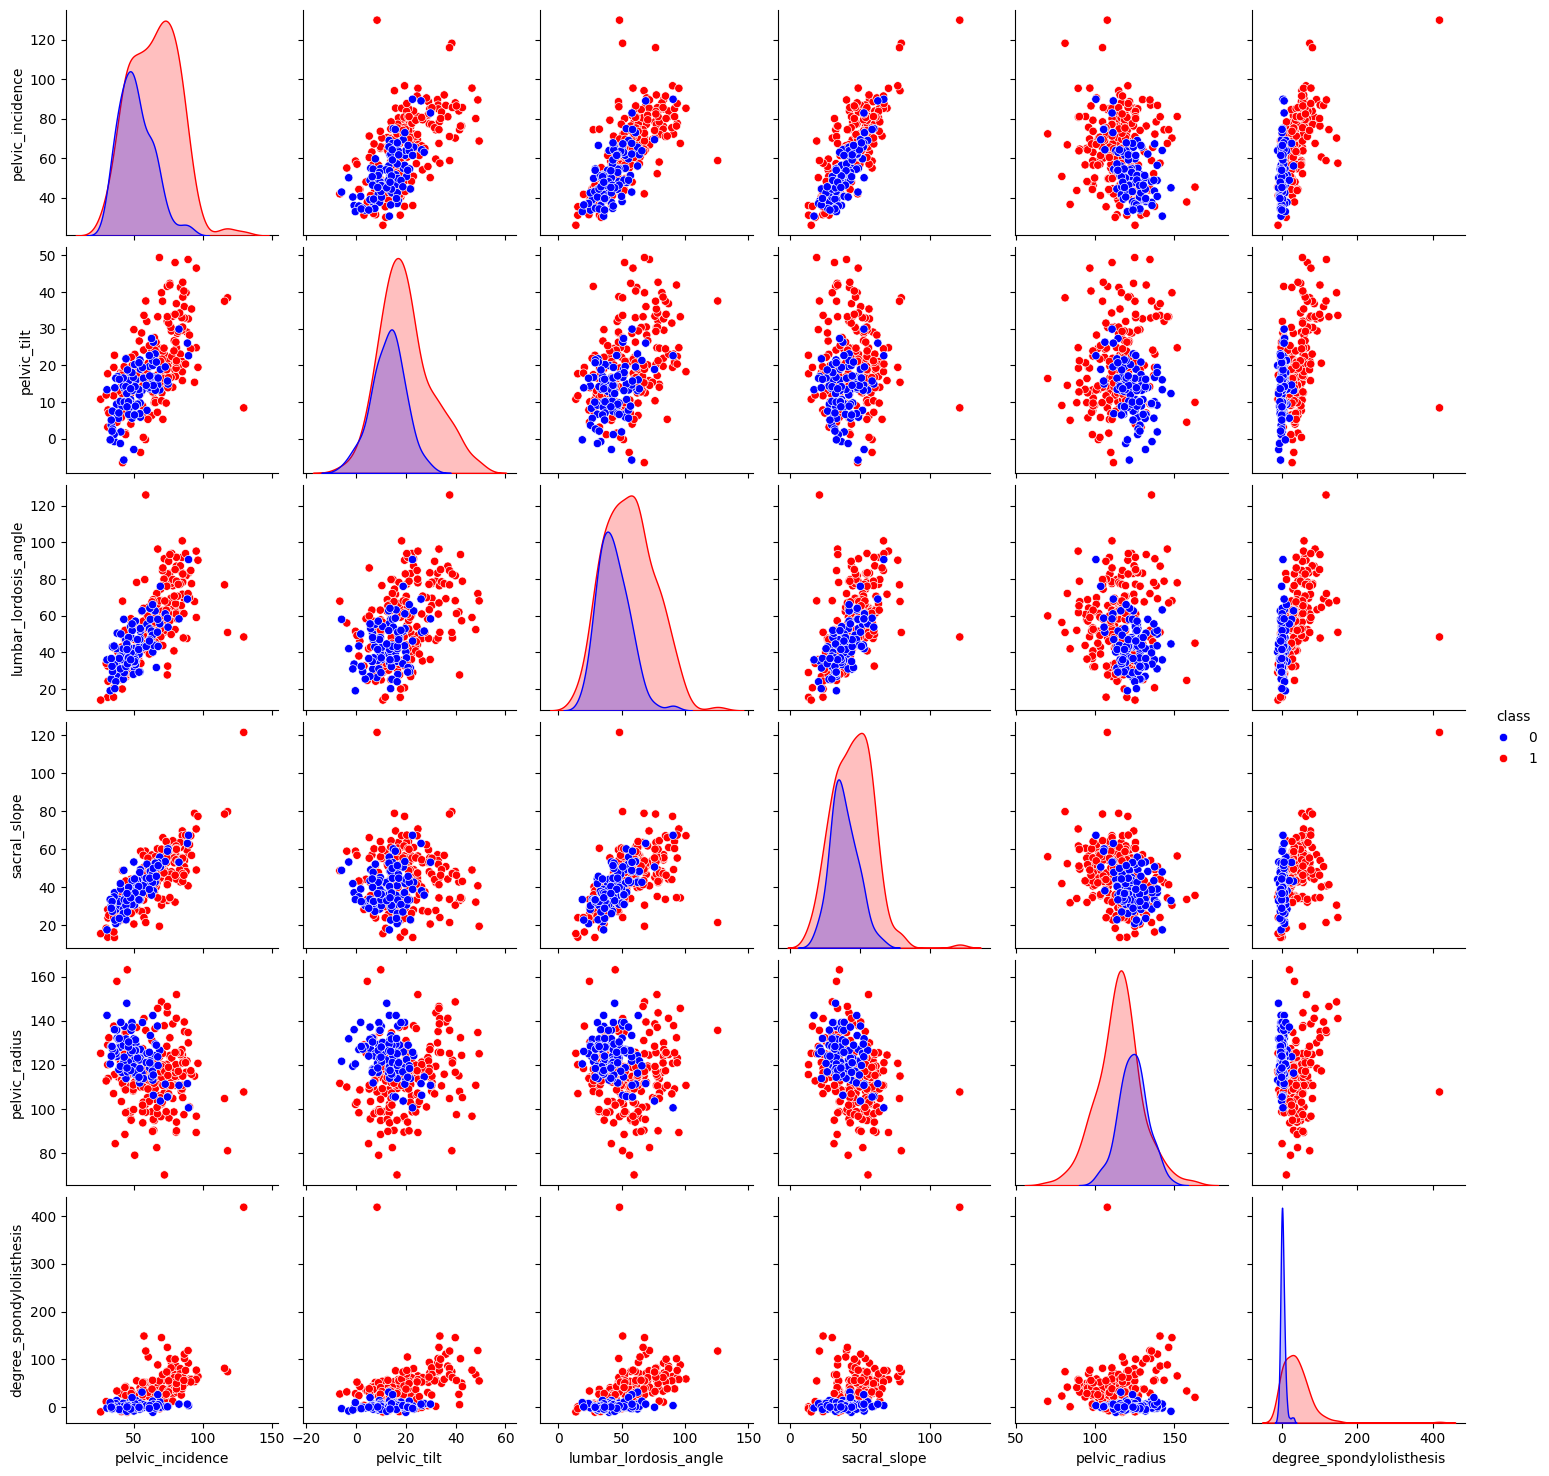

In [3]:
sns.pairplot(data=df, hue='class', palette={1: "red", 0: "blue"})
plt.show()

#### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

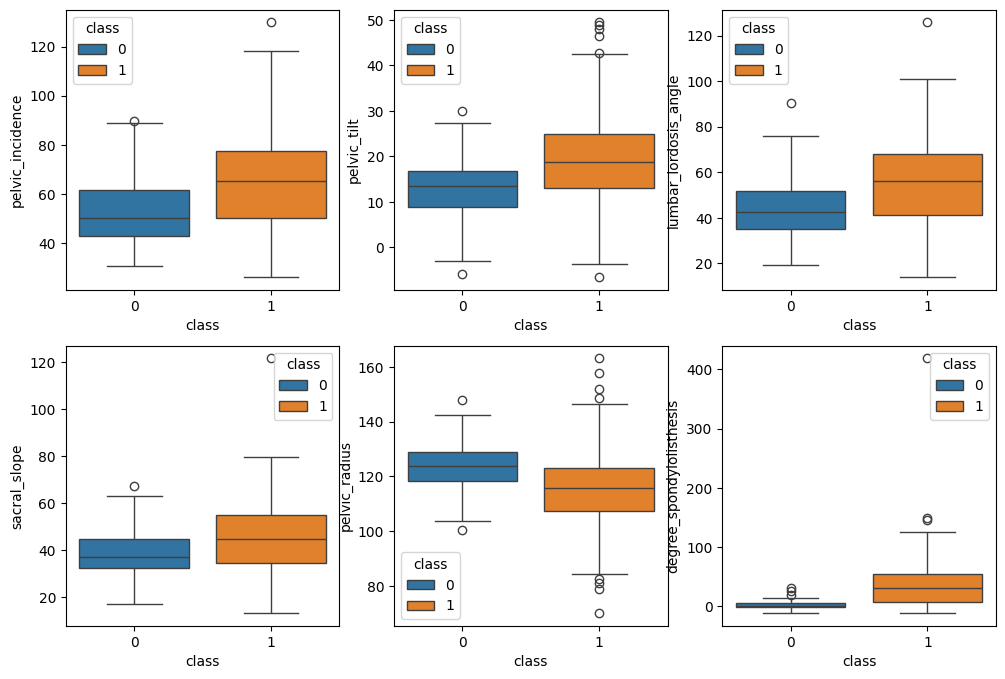

In [4]:
# create a 2*3 subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# create boxplots for each variable
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='class', y= df.columns[i*3+j], ax=axes[i, j], hue='class')

#### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [5]:
df_class0 = df[df['class'] == 0]
df_class1 = df[df['class'] == 1]    

# create the training set
df_train0 = df_class0.iloc[:70]
df_train1 = df_class1.iloc[:140]
df_train = pd.concat([df_train0, df_train1])

#split the training set into X and y    
df_train_x = df_train.drop(columns='class') 
df_train_y = df_train['class']  

#create the testing set
df_test0 = df_class0.iloc[70:]
df_test1 = df_class1.iloc[140:] 
df_test = pd.concat([df_test0, df_test1])

#split the testing set into X and y    
df_test_x = df_test.drop(columns='class')
df_test_y = df_test['class']

### (c) Classification using KNN on Vertebral Column Data Set

#### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [6]:
knn1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn1.fit(df_train_x, df_train_y)
knn1_pred = knn1.predict(df_test_x)

#### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k.  


In [7]:
eu_k = list(range(208, 0, -3))
train_errors = []
test_errors = []
eu_low_trainerr = float('inf')
eu_low_k = None

for i in eu_k:
    # create the KNN model
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(df_train_x, df_train_y)
    
    # get the predict values
    train_pred = knn.predict(df_train_x)
    test_pred = knn.predict(df_test_x)

    # calculate the accuracy    
    train_accuracy = accuracy_score(df_train_y, train_pred)
    test_accuracy = accuracy_score(df_test_y, test_pred)
    
    # compute the train and test error (train error = 1 -train accuracy; test error = 1 - test accuracy)
    trainerr = 1 - train_accuracy
    testerr = 1 - test_accuracy
    train_errors.append(trainerr)
    test_errors.append(testerr)

    # find the lowest train error
    if trainerr < eu_low_trainerr and i != 1:
        eu_low_trainerr = testerr
        eu_low_k = i

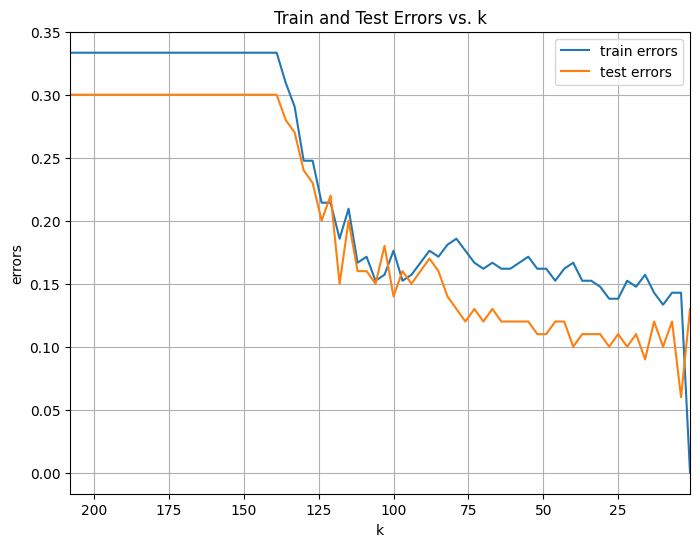

In [8]:
# plot the train and test error
plt.figure(figsize=(8, 6))
plt.plot(eu_k, train_errors, label='train errors')
plt.plot(eu_k, test_errors, label='test errors')
plt.xlabel('k')
plt.xlim(max(eu_k), min(eu_k)) # k in reverse order
plt.ylabel('errors') 
plt.legend()
plt.title('Train and Test Errors vs. k')
plt.grid()
plt.show()

#### Which k* is the most suitable k among those values?

In [9]:
# k is best when test error is minimum
best_k = eu_k[np.argmin(test_errors)] 
eu_besterr = np.min(test_errors)
print(f'The most suitable k is {best_k}')    


The most suitable k is 4



#### Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*.

In [10]:
# create the KNN model with the best k (k*=4)
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
best_knn.fit(df_train_x, df_train_y)

y_pred = best_knn.predict(df_test_x)

#confusion matrix
cm = confusion_matrix(df_test_y, y_pred)
print(f'The confusion matrix when k = {best_k} is: \n', cm)

tn, fp, fn, tp = cm.ravel()
tp_rate = tp / (tp + fn)    
print(f'The true positive rate when k = {best_k} is: {tp_rate}')

tn_rate = tn / (tn + fp)
print(f'The true negative rate when k = {best_k} is: {tn_rate}')

precision = tp / (tp + fp)
print(f'The precision when k = {best_k} is: {precision}')

f1_score = 2 * (precision * tp_rate) / (precision + tp_rate)
print(f'The F1 score when k = {best_k} is: {f1_score}') 

The confusion matrix when k = 4 is: 
 [[25  5]
 [ 1 69]]
The true positive rate when k = 4 is: 0.9857142857142858
The true negative rate when k = 4 is: 0.8333333333333334
The precision when k = 4 is: 0.9324324324324325
The F1 score when k = 4 is: 0.9583333333333333


#### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}.   
Note: for each N, select your training set by choosing the first [N/3] rows of Class 0 and the first N-[N/3] rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve

In [11]:
size = list(range(10, 211, 10)) # the size of the training set 
optimal_k_list = [] # store the optimal k for each size
best_test_error_list = [] # store the best test error obtained by some value of k for each size 

sub_low_trainerr_list = [] # store the lowest train error for each size
sub_low_k_list = [] # store the k that gives the lowest train error for each size   

for n in size:
    # create the new training set
    sub_train0 = df_train0. iloc[:n//3]
    sub_train1 = df_train1.iloc[:n - n//3]
    sub_train = pd.concat([sub_train0, sub_train1])
    
    #split the new training set into x and y
    sub_train_x = sub_train.drop(columns='class')
    sub_train_y = sub_train['class']

    # find the optimal k for the current training set size n
    k = list(range(1, n, 5))
    best_test_error = float('inf')
    sub_low_trainerr = float('inf')

    for i in k:    
        # create the KNN model
        knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
        knn.fit(sub_train_x, sub_train_y)
        
        # get the predict values
        sub_test_pred = knn.predict(df_test_x)
        sub_train_pred = knn.predict(sub_train_x)
        
        # calculate the accuracy
        sub_test_accuracy = accuracy_score(df_test_y, sub_test_pred)
        sub_train_accuracy = accuracy_score(sub_train_y, sub_train_pred)
        
        # calculate the test error
        sub_test_error = 1 - sub_test_accuracy
        sub_train_error = 1 - sub_train_accuracy

        # find the best test error and the optimal k for each training set size
        if sub_test_error < best_test_error:
            best_test_error = sub_test_error
            optimal_k = i

        # find the best train error
        if sub_train_error < sub_low_trainerr and i != 1:
            sub_low_trainerr = sub_train_error
            sub_low_k = i

    best_test_error_list.append(best_test_error)
    optimal_k_list.append(optimal_k)

    sub_low_trainerr_list.append(sub_low_trainerr)
    sub_low_k_list.append(sub_low_k)
        

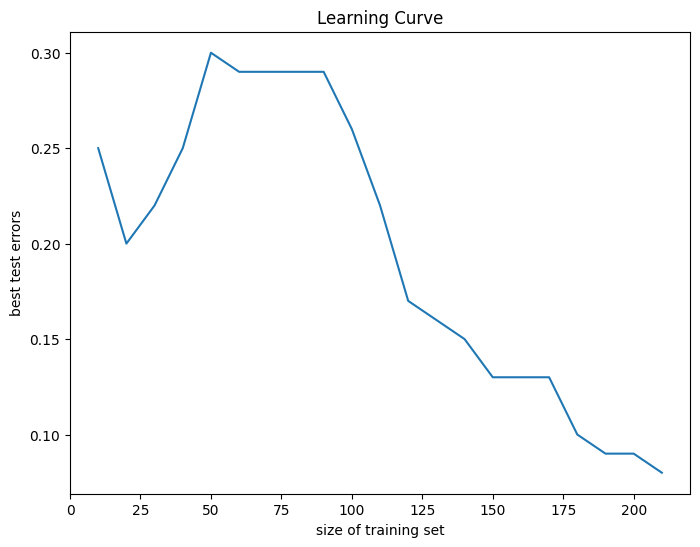

In [12]:
# plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(size, best_test_error_list)
plt.xlabel('size of training set')
plt.ylabel('best test errors')
plt.title('Learning Curve') 
plt.show()

### (d) Replace the Euclidean metric with the following metrics and test them.  
Summarize the test errors (i.e., when k = k*) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}

#### i. Minkowski Distance: 
#### A. which becomes Manhattan Distance with p = 1.



In [13]:
min_man_k = list(range(1, 197, 5))
min_man_test_error = [] # store the test error for each k
manh_low_trainerr = float('inf') # store the lowest train error
manh_low_k = None

for i in min_man_k:
    # create the model
    min_man_knn = KNeighborsClassifier(n_neighbors=i, p=1, metric='manhattan')
    min_man_knn.fit(df_train_x, df_train_y)   
    # get the predict values
    min_man_pred  = min_man_knn.predict(df_test_x)
    manh_train_pred = min_man_knn.predict(df_train_x)
    # calculate the accuracy
    min_man_accu = accuracy_score(df_test_y, min_man_pred)
    manh_train_accu = accuracy_score(df_train_y, manh_train_pred)
    # calculate the test error and store it in the list
    min_man_test_error.append(1-min_man_accu)
    manh_trainerr = 1 - manh_train_accu

    # find the lowest train error
    if manh_trainerr < manh_low_trainerr and i != 1:
        manh_low_trainerr = manh_trainerr
        manh_low_k = i

# list the best test errors and the corresponding k
min_man_best_testerr = np.min(min_man_test_error)
print(f'The best test error when using Manhattan distance is', min_man_best_testerr)

min_indices = list(np.where(min_man_test_error == min_man_best_testerr)[0] ) 
min_man_best_k = []
for i in min_indices:
    min_man_best_k.append(min_man_k[i])
print(f"The corresponding best k is", min_man_best_k)

The best test error when using Manhattan distance is 0.10999999999999999
The corresponding best k is [1, 6, 11, 26]


#### B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k* you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

known that log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1},  
so p = 10 ** 0.1, 10 ** 0.2, ... ,10 ** 1

from iA, there are 4 best k: 1, 6, 11, 26


In [14]:
# get the p values
log_p = np.arange(0.1, 1.1, 0.1)
p_values= 10 ** log_p

log_low_trainerr_list = [] # store the lowest train error for each k

# find the best log10(p) for each of the best k 
for k in min_man_best_k:
    best_lgp = None
    best_lgp_testerr = float('inf')
    log_low_trainerr = float('inf') # store the lowest train error
    log_low_k = None


    for p in p_values:
        # create the model
        log_knn = KNeighborsClassifier(n_neighbors=k, p=p, metric='minkowski')  
        log_knn.fit(df_train_x, df_train_y)
        # get the predict values
        log_pred = log_knn.predict(df_test_x)
        log_train_pred = log_knn.predict(df_train_x)
        # calculate the accuracy
        log_accu = accuracy_score(df_test_y, log_pred)
        log_train_accu = accuracy_score(df_train_y, log_train_pred)
        # calculate the test error
        log_testerr = 1 - log_accu
        log_trainerr = 1 - log_train_accu

        # find the best test error and the corresponding log10(p)
        if log_testerr < best_lgp_testerr:
            best_lgp_testerr = log_testerr
            best_lgp = np.log10(p)

        #find the lowest train error
        if log_trainerr < log_low_trainerr and k != 1:
            log_low_trainerr = log_trainerr
            log_low_k = k
            log_low_trainerr_list.append(log_low_trainerr)

    print (f'When k = {k}, the best log10(p)={best_lgp:.2f}, the best test error is {best_lgp_testerr: .2f}' )



When k = 1, the best log10(p)=0.70, the best test error is  0.11
When k = 6, the best log10(p)=0.60, the best test error is  0.06
When k = 11, the best log10(p)=0.10, the best test error is  0.11
When k = 26, the best log10(p)=0.10, the best test error is  0.10


According to the calculation above, the best log10(p) is 0.6, with the lowest test error of 0.06.

#### C. which becomes Chebyshev Distance with p → ∞

In [15]:
cbsv_k = list(range(1, 197, 5))
cbsv_test_error = []
cbsv_low_trainerr = float('inf')
cbsv_low_k = None

for i in cbsv_k: 
    # create the model
    cbsv_knn = KNeighborsClassifier(n_neighbors=i, p=float('inf'), metric='minkowski')
    cbsv_knn.fit(df_train_x, df_train_y)
    # get the predict values
    cbsv_pred = cbsv_knn.predict(df_test_x)
    cbsv_train_pred = cbsv_knn.predict(df_train_x)
    # calculate the accuracy
    cbsv_accu = accuracy_score(df_test_y, cbsv_pred)
    cbsv_train_accu = accuracy_score(df_train_y, cbsv_train_pred)
    # calculate the test error and store it in the list
    cbsv_test_error.append(1-cbsv_accu)
    cbsv_trainerr = 1 - cbsv_train_accu

    # find the lowest train error
    if cbsv_trainerr < cbsv_low_trainerr and i != 1:
        cbsv_low_trainerr = cbsv_trainerr
        cbsv_low_k = i

# list the best test errors and the corresponding k
cbsv_best_testerr = np.min(cbsv_test_error)
print(f'The best test error when using Chebyshev distance is', cbsv_best_testerr)

cbsv_indices = list(np.where(cbsv_test_error == cbsv_best_testerr)[0] )
cbsv_best_k = []
for i in cbsv_indices:
    cbsv_best_k.append(cbsv_k[i])
print(f"The corresponding best k is {cbsv_best_k}" )

The best test error when using Chebyshev distance is 0.07999999999999996
The corresponding best k is [16]


### ii. Mahalanobis Distance

In [16]:
mah_k = list(range(1, 197, 5))
mah_best_testerr = float('inf')
mah_best_k = None
mah_low_trainerr = float('inf') # store the lowest train error
mah_low_k = None

# calculate the covariance matrix required for Mahalanobis distance
v = np.cov(df_train_x, rowvar=False)
vi = np.linalg.inv(v)

for i in mah_k:
    # create the model
    mah_knn = KNeighborsClassifier(n_neighbors=i, metric='mahalanobis', metric_params={'VI': vi})
    mah_knn.fit(df_train_x, df_train_y)
    # get the predict values
    mah_pred = mah_knn.predict(df_test_x)
    mah_train_pred = mah_knn.predict(df_train_x)
    # calculate the accuracy
    mah_accu = accuracy_score(df_test_y, mah_pred)
    mah_train_accu = accuracy_score(df_train_y, mah_train_pred)
    # calculate the test error and store it in the list
    mah_testerr = 1 - mah_accu
    mah_trainerr = 1 - mah_train_accu

    # find the best test error and the corresponding k
    if mah_testerr < mah_best_testerr and i != 1:
        mah_best_testerr = mah_testerr
        mah_best_k = i

    # find the lowest train error
    if mah_trainerr < mah_low_trainerr and i != 1:
        mah_low_trainerr = mah_trainerr
        mah_low_k = i
print(f'The best test error when using Mahalanobis distance is {mah_best_testerr}, \n the corresponding best k is {mah_best_k}' )  




The best test error when using Mahalanobis distance is 0.16000000000000003, 
 the corresponding best k is 6


In [17]:
#summary
testerr_summary = dict()
testerr_summary['Euclidean Distance'] = eu_besterr
testerr_summary['Manhattan Distance'] = min_man_best_testerr
testerr_summary['log10(p) Manhattan Distance'] = 0.06
testerr_summary['Chebyshev Distance'] = cbsv_best_testerr
testerr_summary['Mahalanobis Distance'] = mah_best_testerr

pd_summary = pd.DataFrame(testerr_summary.items(), columns=['Distance Metric', 'Best Test Error'])
pd_summary

,Distance Metric,Best Test Error
0,Euclidean Distance,0.06
1,Manhattan Distance,0.11
2,log10(p) Manhattan Distance,0.06
3,Chebyshev Distance,0.08
4,Mahalanobis Distance,0.16


### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [18]:
weight_k = list(range(1, 197, 5))   
metric = ['euclidean', 'manhattan', 'chebyshev']
weight_low_trainerr_list = []
low_k_list = []

for i in metric:
    weight_best_testerr = float('inf')
    weight_best_k = None
    low_trainerr = float('inf') # store the lowest train error
    low_k = None

    for k in weight_k:
        # create the model
        weight_knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=i)
        weight_knn.fit(df_train_x, df_train_y)
        # get the predict values
        weight_pred = weight_knn.predict(df_test_x)
        weight_train_pred = weight_knn.predict(df_train_x)
        # calculate the accuracy
        weight_accu = accuracy_score(df_test_y, weight_pred)
        weight_train_accu = accuracy_score(df_train_y, weight_train_pred)
        # calculate the test error
        weight_testerr = 1 - weight_accu
        weight_trainerr = 1 - weight_train_accu

        # find the best test error and the corresponding k
        if weight_testerr < weight_best_testerr and k != 1:
            weight_best_testerr = weight_testerr
            weight_best_k = k
        
        # find the lowest train error
        if weight_trainerr < low_trainerr and k != 1:
            low_trainerr = weight_trainerr
            low_k = k
            weight_low_trainerr_list.append(low_trainerr)
            low_k_list.append(low_k)
    
    print(f'The best test error when using {i} distance is {weight_best_testerr}, \n the corresponding best k is {weight_best_k}.' )    

The best test error when using euclidean distance is 0.09999999999999998, 
 the corresponding best k is 6.
The best test error when using manhattan distance is 0.09999999999999998, 
 the corresponding best k is 26.
The best test error when using chebyshev distance is 0.10999999999999999, 
 the corresponding best k is 16.


### (f) What is the lowest training error rate you achieved in this homework?

When k=1, the training error rate of all the models is 0, which is the lowest training error.   
However, k=1 has no meaning when we deal with classification tasks.   
So I exclude the condition of k=1 when calculating the lowest training error above.  
The lowest training error I calculated for each task is as follows:

In [21]:
# The lowest training error rate in (c)ii Euclidean metric
eu_low_trainerr

0.10999999999999999

In [22]:
# The lowest training error rate in (c)iii Euclidean metric
min(sub_low_trainerr_list)

0.09999999999999998

In [23]:
# The lowest training error rate in (d)iA Manhattan Distance 
manh_low_trainerr

0.1333333333333333

In [24]:
# The lowest training error rate in (d)iB log10(p) Manhattan Distance 
min(log_low_trainerr_list)

0.12857142857142856

In [25]:
# The lowest training error rate in (d)iC Chebyshev Distance
cbsv_low_trainerr

0.1333333333333333

In [26]:
# The lowest training error rate in (d)ii Mahalanobis Distance
mah_low_trainerr

0.13809523809523805

In [27]:
# The lowest training error rate in (e) weighted decision
min(weight_low_trainerr_list)

0.0

#### In conclusion, as shown above, after exclude the condition of k=1, the lowest training error occured in the homework1 is still 0.

### References



`Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani, An Introduction
to Statistical Learning with Applications in Python, Springer, 2023.(chp 4)`  
https://freecomputerbooks.com/An-Introduction-to-Statistical-Learning-with-Python.html  

`Subplotting with matplotlib and seaborn`  
https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8  

`sklearn.neighbors.KNeighborsClassifier`
https://scikit-learn.org/0.15/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier  

`Scikit-learn confusion matrix`  
https://stackoverflow.com/questions/35178590/scikit-learn-confusion-matrix